In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df=pd.read_csv(r"C:\Users\carlo\Documents\Python Projects\Multiple Linear Regression\tennis ace\tennis_stats.csv")


In [6]:
df.shape

(1721, 24)

In [12]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [11]:
df_corr=df.corr().abs() # it doesn't matter if the correlation is negative
                        # we want to make it easier to list the top correlated pairs using .abs()

In [24]:
df_corr=df_corr[df_corr!=1.0] # we remove correlations == 1.0 since they are correlating with themselves
df_corr.unstack().sort_values(ascending=False)[:10] # it's pretty easy to show the original matrix as a series now

ReturnGamesPlayed         ServiceGamesPlayed          0.999842
ServiceGamesPlayed        ReturnGamesPlayed           0.999842
BreakPointsOpportunities  ReturnGamesPlayed           0.978824
ReturnGamesPlayed         BreakPointsOpportunities    0.978824
BreakPointsOpportunities  ServiceGamesPlayed          0.978278
ServiceGamesPlayed        BreakPointsOpportunities    0.978278
BreakPointsFaced          BreakPointsOpportunities    0.973352
BreakPointsOpportunities  BreakPointsFaced            0.973352
BreakPointsFaced          ReturnGamesPlayed           0.972449
ReturnGamesPlayed         BreakPointsFaced            0.972449
dtype: float64

In [18]:
# we take out Player columns since it's an object
x=df[['Year', 'FirstServe','FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking']]
y=df[['FirstServePointsWon']]

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x,y)

In [20]:
model=LinearRegression().fit(x_train,y_train)

In [26]:
y_pred=model.predict(x_test)

In [38]:
model.score(x_test, y_test)

0.9770360985936157

In [39]:
y_test.shape, y_pred.shape

((431, 1), (431, 1))

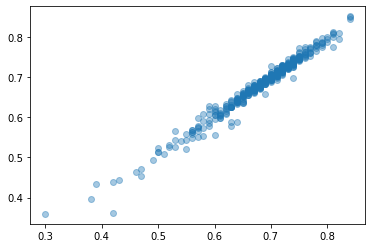

In [40]:
plt.scatter(y_test, y_pred, alpha=0.4)  # so we want to plot x=y_test and y=y_pred as a scatter plot to see if a straight line is formed
                                        # if a straight line is formed, the more accurate our model
                                        # y_test and y_pred are the same shape so we can plot them together
                                        # if they were not the same shape, we cannot plot the graph
                                        # alpha sets the transparency of the dots